In [171]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

1. Data Preprocessing


1.1. Load the Dataset


In [172]:
bank_data = pd.read_csv("bank_marketing_dataset.csv")
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [173]:
print(bank_data.shape)


(11162, 17)


In [174]:
print(bank_data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [175]:
print(bank_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [176]:
print(bank_data.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


In [177]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


1.2. Separate Features and Target Variable


In [178]:
X = bank_data.drop(columns=["deposit"])
y = bank_data["deposit"]


1.3. Identify Categorical and Numeric Columns


In [179]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()


In [180]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [181]:
numeric_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

1.4. Handle Binary and Non-Binary Categorical Columns


In [182]:
binary_cols = ["default", "housing", "loan", "contact", "poutcome"]
non_binary_categorical_cols = list(set(categorical_cols) - set(binary_cols))


In [183]:
binary_cols

['default', 'housing', 'loan', 'contact', 'poutcome']

1.5. Encode Binary Categorical Columns


In [184]:
binary_transformer = LabelEncoder()
for col in binary_cols:
    X[col] = binary_transformer.fit_transform(X[col])


1.6. One-Hot Encode Non-Binary Categorical Columns


In [185]:
X = pd.get_dummies(X, columns=non_binary_categorical_cols, drop_first=True)

1.7. Standardize Numeric Columns


In [186]:
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
X[numeric_cols]

,age,balance,day,duration,campaign,pdays,previous
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.363260
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.363260
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.363260
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.363260
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.363260
...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,-0.331287,-0.554168,-0.481184,-0.363260
11158,-0.187357,-0.246658,0.040612,-0.832564,0.547981,-0.481184,-0.363260
11159,-0.774958,-0.464934,0.396891,-0.622258,-0.186785,-0.481184,-0.363260
11160,0.148416,-0.473926,-0.909466,-1.045752,-0.186785,1.109571,1.818332


1.8. Encode Target Variable


In [187]:
y = binary_transformer.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

1.9. Split the Data into Training and Test Sets


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [189]:
print("Preprocessing complete!")


Preprocessing complete!


2. Feature Selection


In [190]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
import pandas as pd
import matplotlib.pyplot as plt

2.1. Correlation Analysis


In [191]:
correlations = X_train.corrwith(pd.Series(y_train))
correlation_ranking = correlations.sort_values(ascending=False)

2.2. Mutual Information


In [192]:
mutual_info = mutual_info_classif(X_train, y_train, random_state=42)
mutual_info_series = pd.Series(mutual_info, index=X_train.columns).sort_values(ascending=False)


2.3. SelectKBest (ANOVA F-value)


In [193]:
select_k_best = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
select_k_best.fit(X_train, y_train)
k_best_scores = pd.Series(select_k_best.scores_, index=X_train.columns).sort_values(ascending=False)


2.4. Plot Top Features


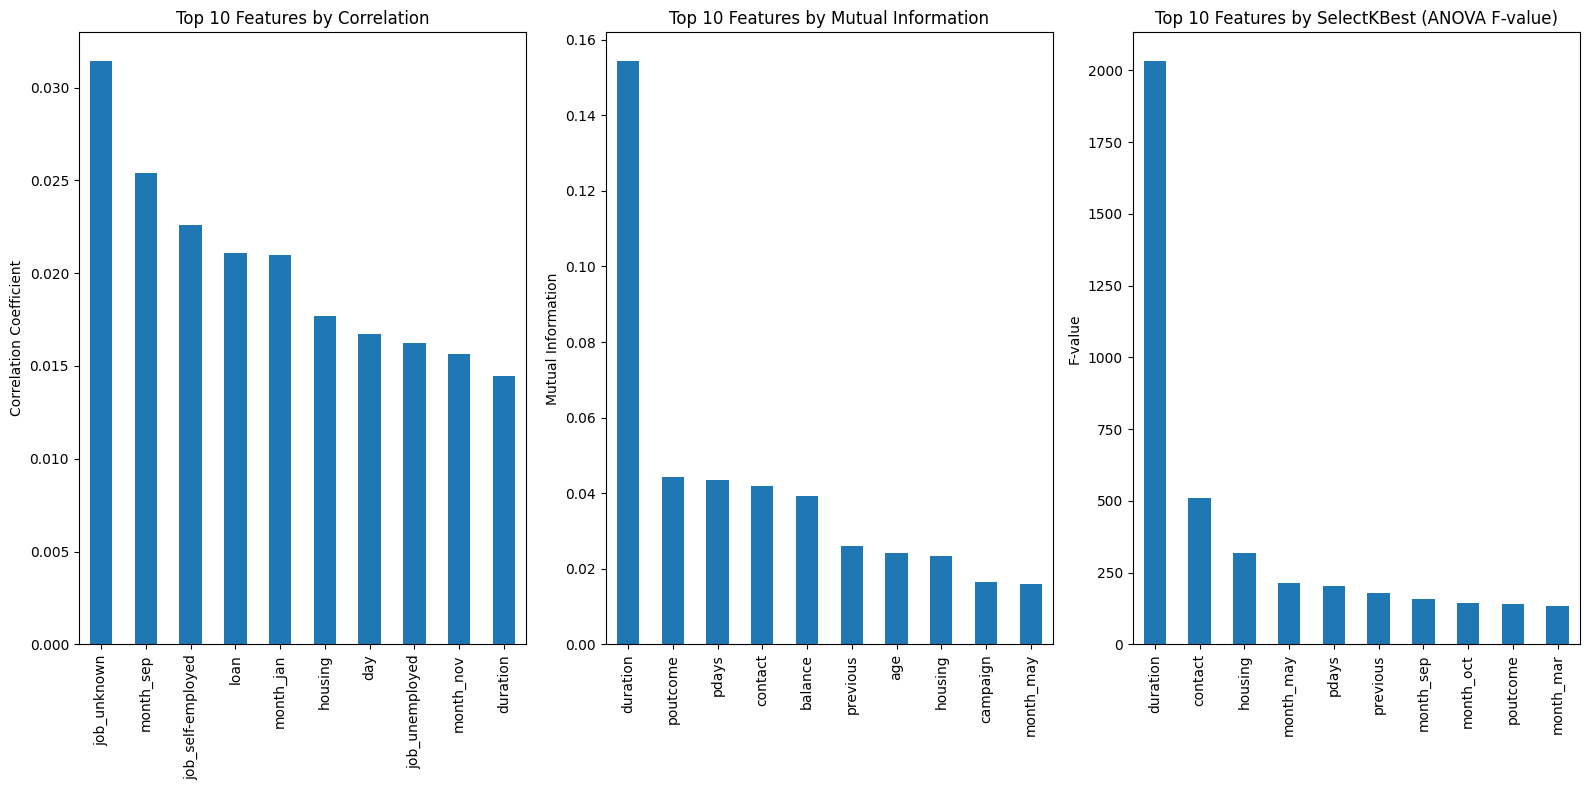

In [194]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
correlation_ranking[:10].plot(kind="bar", title="Top 10 Features by Correlation")
plt.ylabel("Correlation Coefficient")
plt.subplot(1, 3, 2)
mutual_info_series[:10].plot(kind="bar", title="Top 10 Features by Mutual Information")
plt.ylabel("Mutual Information")
plt.subplot(1, 3, 3)
k_best_scores[:10].plot(kind="bar", title="Top 10 Features by SelectKBest (ANOVA F-value)")
plt.ylabel("F-value")
plt.tight_layout()
plt.show()


2.5. Display Top Features for Each Method


In [195]:
print("Top 10 Features by Correlation:\n", correlation_ranking[:10])
print("\nTop 10 Features by Mutual Information:\n", mutual_info_series[:10])
print("\nTop 10 Features by SelectKBest:\n", k_best_scores[:10])

Top 10 Features by Correlation:
 job_unknown          0.031404
month_sep            0.025408
job_self-employed    0.022578
loan                 0.021070
month_jan            0.020980
housing              0.017715
day                  0.016746
job_unemployed       0.016225
month_nov            0.015647
duration             0.014458
dtype: float64

Top 10 Features by Mutual Information:
 duration     0.154245
poutcome     0.044373
pdays        0.043464
contact      0.041994
balance      0.039232
previous     0.026019
age          0.024200
housing      0.023473
campaign     0.016391
month_may    0.015896
dtype: float64

Top 10 Features by SelectKBest:
 duration     2031.155984
contact       508.844197
housing       319.817368
month_may     215.089790
pdays         203.609042
previous      177.478627
month_sep     158.407949
month_oct     144.689702
poutcome      139.289578
month_mar     135.545941
dtype: float64


3. Model Training


In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

3.1. Initialize Models


In [197]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

3.2. Perform 5-Fold Cross-Validation


In [198]:
logistic_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')
decision_tree_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='accuracy')
random_forest_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='accuracy')


In [199]:
logistic_scores

array([0.8112604 , 0.8240563 , 0.8106206 , 0.80025608, 0.81818182])

In [200]:
decision_tree_scores

array([0.76583493, 0.76839411, 0.78950736, 0.78233035, 0.78617157])

In [201]:
random_forest_scores

array([0.85540627, 0.84708893, 0.84772873, 0.85659411, 0.85915493])

3.3. Print Average Cross-Validation Accuracy


In [202]:
print("Logistic Regression Average Accuracy:", np.mean(logistic_scores))
print("Decision Tree Average Accuracy:", np.mean(decision_tree_scores))
print("Random Forest Average Accuracy:", np.mean(random_forest_scores))

Logistic Regression Average Accuracy: 0.812875040038404
Decision Tree Average Accuracy: 0.778447664993041
Random Forest Average Accuracy: 0.8531945936071264


4. Feature Importance & Impact


In [203]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

4.1. Train Random Forest and Analyze Feature Importance


In [204]:
# Train Random Forest to analyze feature importance
random_forest_model.fit(X_train, y_train)
feature_importances = random_forest_model.feature_importances_

4.2. Create DataFrame for Feature Importance


In [205]:
# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

4.3. Plot Top 10 Features by Importance (Random Forest)


<Figure size 1000x600 with 0 Axes>

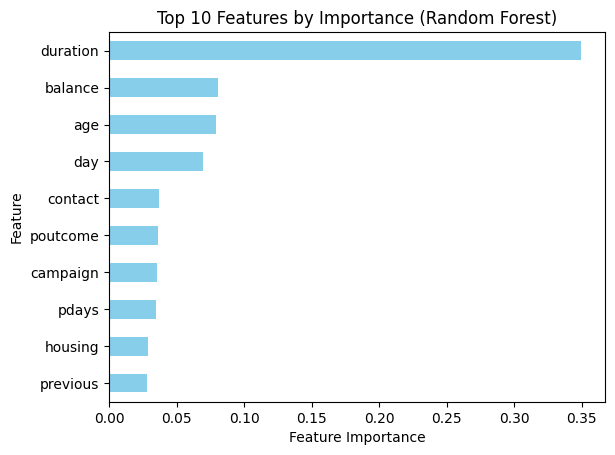

In [206]:
# Plot the top 10 features
plt.figure(figsize=(10, 6))
importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False, color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Features by Importance (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

4.4. Interpret Results for Logistic Regression


In [207]:
# Interpret results for logistic regression
logistic_model.fit(X_train, y_train)
coefficients = logistic_model.coef_[0]

4.5. Create DataFrame for Logistic Regression Coefficients


In [208]:
# Create a DataFrame for logistic regression coefficients
logistic_coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)


4.6. Print Top Features with Positive and Negative Impact


In [209]:
# Print top features with positive and negative impact
print("Top Features with Positive Impact (Logistic Regression):")
print(logistic_coefficients_df.head(10))
print("\nTop Features with Negative Impact (Logistic Regression):")
print(logistic_coefficients_df.tail(10))

Top Features with Positive Impact (Logistic Regression):
               Feature  Coefficient
7             duration     1.869206
29           month_mar     1.752247
33           month_sep     1.290819
32           month_oct     1.258724
24           month_dec     1.205776
37  education_tertiary     0.571405
19         job_student     0.464768
38   education_unknown     0.449892
9                pdays     0.312240
28           month_jun     0.284867

Top Features with Negative Impact (Logistic Regression):
              Feature  Coefficient
17  job_self-employed    -0.413401
4                loan    -0.550281
13   job_entrepreneur    -0.617985
30          month_may    -0.625326
5             contact    -0.719484
23          month_aug    -0.780942
31          month_nov    -0.802164
3             housing    -0.822517
27          month_jul    -0.859348
26          month_jan    -0.982987


5. Model Evaluation and Comparison


In [210]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

5.1. Train Models on the Training Set


In [211]:
# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

In [212]:
# Train models on the training set
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

5.2. Predict on the Test Set


In [213]:
# Predict on the test set
logistic_preds = logistic_model.predict(X_test)
decision_tree_preds = decision_tree_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)

5.3. Evaluate Models


In [214]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}\n")
    return accuracy, precision, recall, f1


5.4. Print Evaluation Metrics for Each Model


In [215]:
# Evaluate each model
logistic_metrics = evaluate_model(y_test, logistic_preds, "Logistic Regression")
decision_tree_metrics = evaluate_model(y_test, decision_tree_preds, "Decision Tree")
random_forest_metrics = evaluate_model(y_test, random_forest_preds, "Random Forest")


Model: Logistic Regression
Accuracy: 0.8089
Precision: 0.8138
Recall: 0.7803
F1-Score: 0.7967

Model: Decision Tree
Accuracy: 0.7820
Precision: 0.7763
Recall: 0.7666
F1-Score: 0.7714

Model: Random Forest
Accuracy: 0.8414
Precision: 0.8150
Recall: 0.8662
F1-Score: 0.8398



5.5. Feature Importance from Random Forest


In [216]:
# Feature importance from Random Forest
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": random_forest_model.feature_importances_
}).sort_values(by="Importance", ascending=False)


5.6. Plot Top 10 Features by Importance


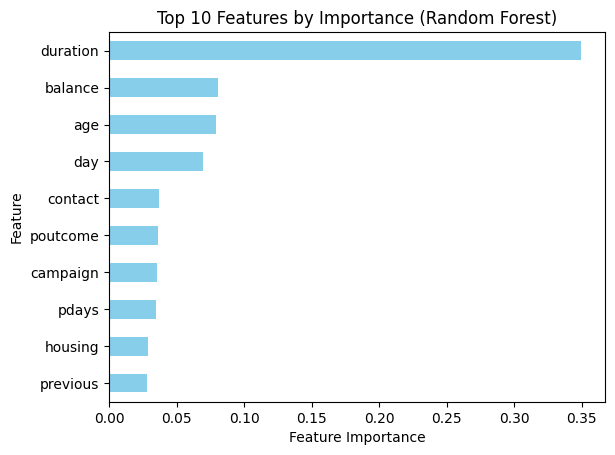

In [217]:
# Plot top 10 features
feature_importances.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False, color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Features by Importance (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


5.7. Print Feature Importance Ranking


In [218]:
# Print feature importance ranking
print("Top 10 Features by Random Forest Importance:")
print(feature_importances.head(10))

Top 10 Features by Random Forest Importance:
     Feature  Importance
7   duration    0.349776
2    balance    0.080900
0        age    0.079143
6        day    0.069591
5    contact    0.037186
11  poutcome    0.036572
8   campaign    0.035158
9      pdays    0.034895
3    housing    0.029117
10  previous    0.028212


5.8. Logistic Regression Coefficients


In [219]:
# Logistic regression coefficients
logistic_coefficients_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": logistic_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)


5.9. Print Top Positive and Negative Impact Features


In [220]:
# Print top positive and negative impact features
print("\nTop Features with Positive Impact (Logistic Regression):")
print(logistic_coefficients_df.head(10))
print("\nTop Features with Negative Impact (Logistic Regression):")
print(logistic_coefficients_df.tail(10))


Top Features with Positive Impact (Logistic Regression):
               Feature  Coefficient
7             duration     1.869206
29           month_mar     1.752247
33           month_sep     1.290819
32           month_oct     1.258724
24           month_dec     1.205776
37  education_tertiary     0.571405
19         job_student     0.464768
38   education_unknown     0.449892
9                pdays     0.312240
28           month_jun     0.284867

Top Features with Negative Impact (Logistic Regression):
              Feature  Coefficient
17  job_self-employed    -0.413401
4                loan    -0.550281
13   job_entrepreneur    -0.617985
30          month_may    -0.625326
5             contact    -0.719484
23          month_aug    -0.780942
31          month_nov    -0.802164
3             housing    -0.822517
27          month_jul    -0.859348
26          month_jan    -0.982987
